In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from data_types import ChordType

In [2]:
cqt = pd.read_csv('./data_reduc/df_reduc_cqt.csv')
vqt = pd.read_csv('./data_reduc/df_reduc_vqt.csv')
mel = pd.read_csv('./data_reduc/df_reduc_mel.csv')
stft = pd.read_csv('./data_reduc/df_reduc_stft.csv')

print(vqt.columns)

Index(['Unnamed: 0', 'root', 'chord_type', 'inversion', 'dist_to_Cmaj',
       'dist_to_Cmaj_filtered', 'dist_to_Cmaj_peak', 'dist_to_Cmaj_inv1',
       'dist_to_Cmaj_filtered_inv1', 'dist_to_Cmaj_peak_inv1',
       'dist_to_Cmaj_inv2', 'dist_to_Cmaj_filtered_inv2',
       'dist_to_Cmaj_peak_inv2', 'dist_to_Cmin', 'dist_to_Cmin_filtered',
       'dist_to_Cmin_peak', 'dist_to_Cmin_inv1', 'dist_to_Cmin_filtered_inv1',
       'dist_to_Cmin_peak_inv1', 'dist_to_Cmin_inv2',
       'dist_to_Cmin_filtered_inv2', 'dist_to_Cmin_peak_inv2', 'dist_to_Cdim',
       'dist_to_Cdim_filtered', 'dist_to_Cdim_peak', 'dist_to_Cdim_inv1',
       'dist_to_Cdim_filtered_inv1', 'dist_to_Cdim_peak_inv1',
       'dist_to_Cdim_inv2', 'dist_to_Cdim_filtered_inv2',
       'dist_to_Cdim_peak_inv2', 'dist_to_Caug', 'dist_to_Caug_filtered',
       'dist_to_Caug_peak', 'dist_to_Caug_inv1', 'dist_to_Caug_filtered_inv1',
       'dist_to_Caug_peak_inv1', 'dist_to_Caug_inv2',
       'dist_to_Caug_filtered_inv2', 'dist_to

In [3]:
vqt.head()

,Unnamed: 0,root,chord_type,inversion,dist_to_Cmaj,dist_to_Cmaj_filtered,dist_to_Cmaj_peak,dist_to_Cmaj_inv1,dist_to_Cmaj_filtered_inv1,dist_to_Cmaj_peak_inv1,...,dist_to_Cdim_peak_inv2,dist_to_Caug,dist_to_Caug_filtered,dist_to_Caug_peak,dist_to_Caug_inv1,dist_to_Caug_filtered_inv1,dist_to_Caug_peak_inv1,dist_to_Caug_inv2,dist_to_Caug_filtered_inv2,dist_to_Caug_peak_inv2
0,0,-12,ChordType.AUGMENTED,0,0.567737,0.568918,0.526588,0.337147,0.339611,0.352880,...,0.825807,0.496203,0.497462,0.445675,0.216811,0.217427,0.236400,0.459748,0.460856,0.425150
1,1,-12,ChordType.MAJOR,0,0.476878,0.477811,0.420272,0.198100,0.198737,0.215983,...,0.833230,0.623373,0.624870,0.598402,0.381469,0.383924,0.404556,0.615741,0.618416,0.580185
2,2,-12,ChordType.DIMINISHED,0,0.721946,0.724373,0.717691,0.751970,0.760922,0.733061,...,0.348442,0.779244,0.781565,0.783207,0.784830,0.793332,0.772094,0.771029,0.774648,0.773986
3,3,-12,ChordType.MINOR,0,0.542040,0.543674,0.513990,0.493499,0.498009,0.478535,...,0.634678,0.760695,0.763147,0.761917,0.769785,0.777130,0.750581,0.751341,0.755470,0.751711
4,4,-12,ChordType.AUGMENTED,1,0.820585,0.823747,0.776813,0.706986,0.711758,0.665373,...,0.785528,0.836542,0.840478,0.820607,0.684312,0.687547,0.657225,0.808276,0.811988,0.784083


In [4]:
len(vqt)

300

Text(0.5, 0.98, 'Distance to Cmaj (each comparison triades being inversed ; using VQT)')

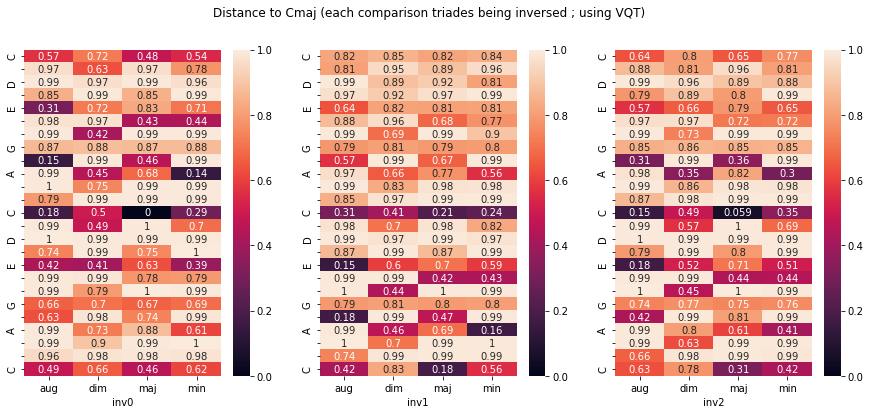

In [5]:
fig, axs = plt.subplots(1,3,figsize = (15,6))

for i in range (3):
    to_plot = vqt[vqt['inversion']==i].pivot(index='root', 
                        columns='chord_type', 
                        values='dist_to_Cmaj')
    
    xticklabels = ['aug', 'dim', 'maj', 'min']
    
    yticklabels = ['C','','D','','E','','','G','','A','','',
                    'C','','D','','E','','','G','','A','','',
                    'C']
    
    sns.heatmap(to_plot, annot=True, vmin = 0, vmax = 1,
                xticklabels=xticklabels, yticklabels=yticklabels,
                ax = axs[i])
    axs[i].set(xlabel=f'inv{i}', ylabel='')

fig.suptitle('Distance to Cmaj (each comparison triades being inversed ; using VQT)')
#fig.tight_layout()

Text(0.5, 0.98, 'Distance to Cmaj (no inversion for the comparison triades ; using VQT)')

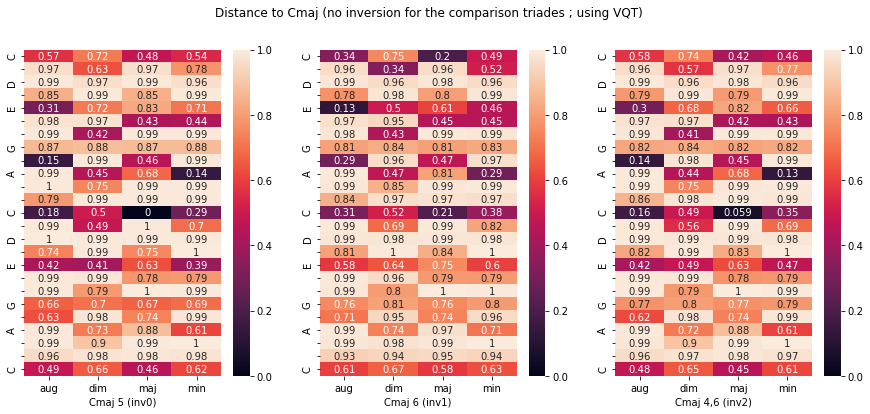

In [6]:
fig, axs = plt.subplots(1,3,figsize = (15,6))

to_plot_inv0 = vqt[vqt['inversion']==0].pivot(index='root', 
                    columns='chord_type', 
                    values='dist_to_Cmaj')
to_plot_inv1 = vqt[vqt['inversion']==0].pivot(index='root', 
                    columns='chord_type', 
                    values='dist_to_Cmaj_inv1')
to_plot_inv2 = vqt[vqt['inversion']==0].pivot(index='root', 
                    columns='chord_type', 
                    values='dist_to_Cmaj_inv2')


xticklabels = ['aug', 'dim', 'maj', 'min']
    
yticklabels = ['C','','D','','E','','','G','','A','','',
                    'C','','D','','E','','','G','','A','','',
                    'C']
    
sns.heatmap(to_plot_inv0, annot=True, vmin = 0, vmax = 1,
            xticklabels=xticklabels, yticklabels=yticklabels,
            ax = axs[0])
sns.heatmap(to_plot_inv1, annot=True, vmin = 0, vmax = 1,
            xticklabels=xticklabels, yticklabels=yticklabels,
            ax = axs[1])
sns.heatmap(to_plot_inv2, annot=True, vmin = 0, vmax = 1,
            xticklabels=xticklabels, yticklabels=yticklabels,
            ax = axs[2])

axs[0].set(xlabel='Cmaj 5 (inv0)', ylabel='')
axs[1].set(xlabel='Cmaj 6 (inv1)', ylabel='')
axs[2].set(xlabel='Cmaj 4,6 (inv2)', ylabel='')
fig.suptitle('Distance to Cmaj (no inversion for the comparison triades ; using VQT)')    
#fig.tight_layout()

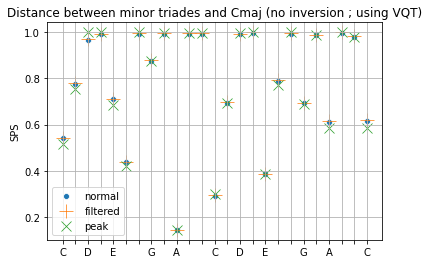

In [9]:
chord_type = 'ChordType.MINOR'
inversion = 0

ax = sns.scatterplot(data=vqt.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj', label='normal', marker='o');
ax = sns.scatterplot(data=vqt.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj_filtered', label='filtered', marker='+', s=200)
ax = sns.scatterplot(data=vqt.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj_peak', label='peak', marker='x', s=100)

ax.set(title='Distance between minor triades and Cmaj (no inversion ; using VQT)',xlabel='', ylabel='SPS')
ax.set_xticks(np.arange(-12,13))
ax.set_xticklabels(['C','','D','','E','','','G','','A','','',
                    'C','','D','','E','','','G','','A','','',
                    'C'])
ax.grid()
plt.legend()
fig.tight_layout()

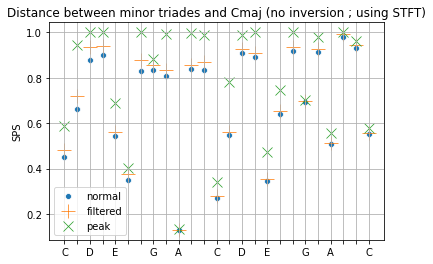

In [10]:
chord_type = 'ChordType.MINOR'
inversion = 0

ax = sns.scatterplot(data=stft.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj', label='normal', marker='o');
ax = sns.scatterplot(data=stft.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj_filtered', label='filtered', marker='+', s=200)
ax = sns.scatterplot(data=stft.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj_peak', label='peak', marker='x', s=100)

ax.set(title='Distance between minor triades and Cmaj (no inversion ; using STFT)',xlabel='', ylabel='SPS')
ax.set_xticks(np.arange(-12,13))
ax.set_xticklabels(['C','','D','','E','','','G','','A','','',
                    'C','','D','','E','','','G','','A','','',
                    'C'])
ax.grid()
plt.legend()
fig.tight_layout()

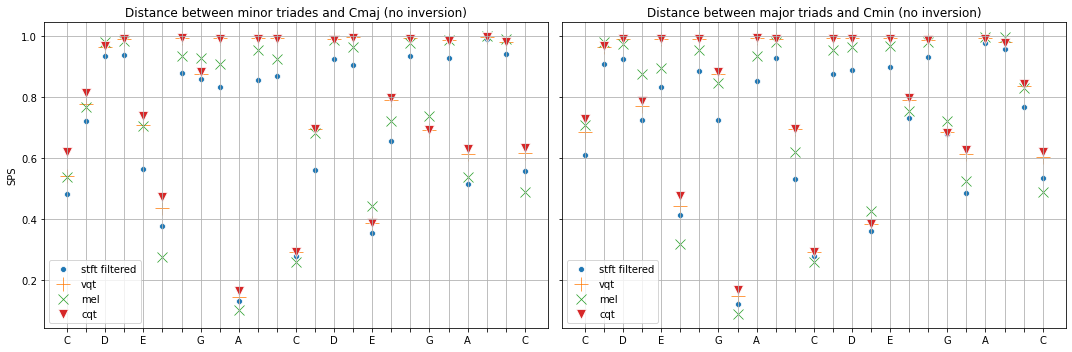

In [11]:
chord_type = 'ChordType.MINOR'
inversion = 0

fig, axs = plt.subplots(1,2, figsize=(15,5), sharey = True)

sns.scatterplot(data=stft.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj_filtered', label='stft filtered', marker='o', ax=axs[0]);
sns.scatterplot(data=vqt.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj', label='vqt', marker='+', s=200, ax=axs[0])
sns.scatterplot(data=mel.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj', label='mel', marker='x', s=100, ax=axs[0])
sns.scatterplot(data=cqt.query('chord_type == @chord_type'), 
                     x='root', y='dist_to_Cmaj', label='cqt', marker='v', s=100, ax=axs[0])

axs[0].set(title='Distance between minor triades and Cmaj (no inversion)',xlabel='', ylabel='SPS')
axs[0].set_xticks(np.arange(-12,13))
axs[0].set_xticklabels(['C','','D','','E','','','G','','A','','',
                    'C','','D','','E','','','G','','A','','',
                    'C'])
axs[0].grid()


chord_type = 'ChordType.MAJOR'

sns.scatterplot(data=stft.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmin_filtered', label='stft filtered', marker='o', ax = axs[1]);
sns.scatterplot(data=vqt.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmin', label='vqt', marker='+', s=200, ax = axs[1])
sns.scatterplot(data=mel.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmin', label='mel', marker='x', s=100, ax = axs[1])
sns.scatterplot(data=cqt.query('chord_type == @chord_type'), 
                     x='root', y='dist_to_Cmin', label='cqt', marker='v', s=100, ax = axs[1])

axs[1].set(title='Distance between major triads and Cmin (no inversion)',xlabel='', ylabel='SPS')
axs[1].set_xticks(np.arange(-12,13))
axs[1].set_xticklabels(['C','','D','','E','','','G','','A','','',
                    'C','','D','','E','','','G','','A','','',
                    'C'])
axs[1].grid()
plt.legend()
fig.tight_layout()

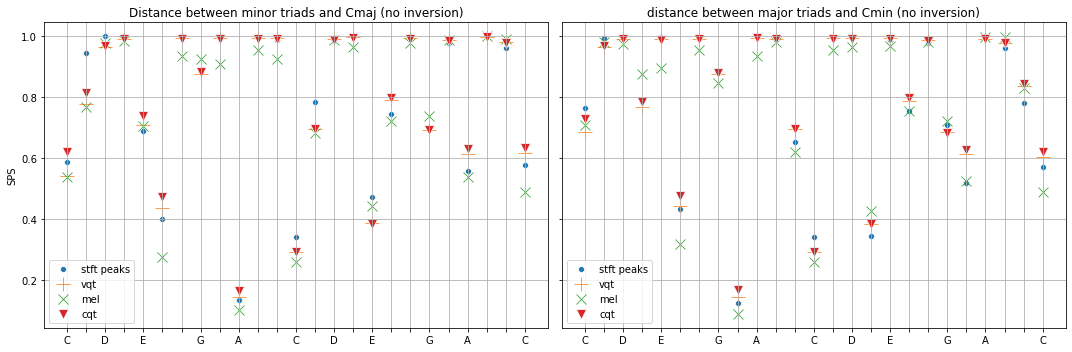

In [76]:
chord_type = 'ChordType.MINOR'
inversion = 0

fig, axs = plt.subplots(1,2, figsize=(15,5), sharey = True)

sns.scatterplot(data=stft.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj_peak', label='stft peaks', marker='o', ax=axs[0]);
sns.scatterplot(data=vqt.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj', label='vqt', marker='+', s=200, ax=axs[0])
sns.scatterplot(data=mel.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj', label='mel', marker='x', s=100, ax=axs[0])
sns.scatterplot(data=cqt.query('chord_type == @chord_type'), 
                     x='root', y='dist_to_Cmaj', label='cqt', marker='v', s=100, ax=axs[0])

axs[0].set(title='Distance between minor triads and Cmaj (no inversion)',xlabel='', ylabel='SPS')
axs[0].set_xticks(np.arange(-12,13))
axs[0].set_xticklabels(['C','','D','','E','','','G','','A','','',
                    'C','','D','','E','','','G','','A','','',
                    'C'])
axs[0].grid()


chord_type = 'ChordType.MAJOR'

sns.scatterplot(data=stft.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmin_peak', label='stft peaks', marker='o', ax = axs[1]);
sns.scatterplot(data=vqt.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmin', label='vqt', marker='+', s=200, ax = axs[1])
sns.scatterplot(data=mel.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmin', label='mel', marker='x', s=100, ax = axs[1])
sns.scatterplot(data=cqt.query('chord_type == @chord_type'), 
                     x='root', y='dist_to_Cmin', label='cqt', marker='v', s=100, ax = axs[1])

axs[1].set(title='distance between major triads and Cmin (no inversion)',xlabel='', ylabel='SPS')
axs[1].set_xticks(np.arange(-12,13))
axs[1].set_xticklabels(['C','','D','','E','','','G','','A','','',
                    'C','','D','','E','','','G','','A','','',
                    'C'])
axs[1].grid()
plt.legend()
fig.tight_layout()

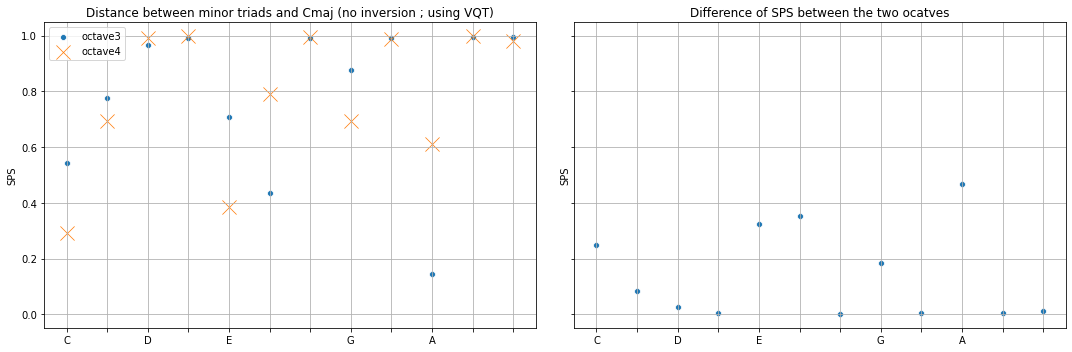

In [65]:
chord_type = 'ChordType.MINOR'
inversion = 0
range1 = np.arange(-12,0)
range2 = np.arange(0,12)

octave3 = vqt.query('chord_type == @chord_type and inversion == @inversion and root in @range1')['dist_to_Cmaj']
octave4 = vqt.query('chord_type == @chord_type and inversion == @inversion and root in @range2')['dist_to_Cmaj']
pc = np.arange(12)
diff = [np.abs(oc3-oc4) for oc3, oc4 in zip(list(octave3), list(octave4))]

fig, axs = plt.subplots(1,2, figsize=(15,5), sharey=True)

sns.scatterplot(x=pc, y=octave3, label='octave3', marker='o', ax=axs[0])
sns.scatterplot(x=pc, y=octave4, label='octave4', marker='x', s=200, ax=axs[0])
axs[0].set(title='Distance between minor triads and Cmaj (no inversion ; using VQT)',xlabel='', ylabel='SPS')
axs[0].set_xticks(np.arange(12))
axs[0].set_xticklabels(['C','','D','','E','','','G','','A','',''])
axs[0].grid()
axs[0].legend()

sns.scatterplot(x=pc, y=diff, ax=axs[1])
axs[1].set(title='Difference of SPS between the two ocatves',xlabel='', ylabel='SPS')
axs[1].set_xticks(np.arange(12))
axs[1].set_xticklabels(['C','','D','','E','','','G','','A','',''])
axs[1].grid()

fig.tight_layout()

___

___

In [77]:
from Chord_SPS import chord_SPS
from data_types import ChordType

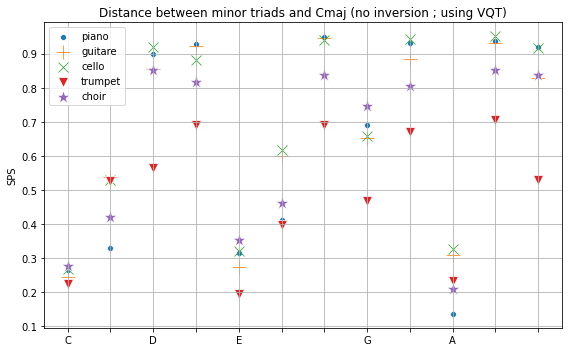

In [89]:
chord_type = ChordType.MINOR
roots = np.arange(0,12)
programs = [0, 24, 42, 56, 91]

piano = [chord_SPS(0,root,ChordType.MAJOR, chord_type,
                    program1=0,program2=0)[0] for root in roots]
guitare = [chord_SPS(0,root,ChordType.MAJOR, chord_type,
                     program1=24,program2=24)[0] for root in roots]
cello = [chord_SPS(0,root,ChordType.MAJOR, chord_type,
                   program1=42,program2=42)[0] for root in roots]
trumpet = [chord_SPS(0,root,ChordType.MAJOR, chord_type,
                     program1=56,program2=56)[0] for root in roots]
choir = [chord_SPS(0,root,ChordType.MAJOR, chord_type,
                   program1=91,program2=91)[0] for root in roots]
pc = np.arange(12)

fig, axs = plt.subplots(1,1, figsize=(8,5))

sns.scatterplot(x=pc, y=piano, label='piano', marker='o', ax=axs)
sns.scatterplot(x=pc, y=guitare, label='guitare', marker='+', s=200, ax=axs)
sns.scatterplot(x=pc, y=cello, label='cello', marker='x', s=100, ax=axs)
sns.scatterplot(x=pc, y=trumpet, label='trumpet', marker='v', s=100, ax=axs)
sns.scatterplot(x=pc, y=choir, label='choir', marker='*', s=200, ax=axs)

axs.set(title='Distance between minor triads and Cmaj (no inversion ; using VQT)',xlabel='', ylabel='SPS')
axs.set_xticks(np.arange(12))
axs.set_xticklabels(['C','','D','','E','','','G','','A','',''])
axs.grid()
axs.legend()

fig.tight_layout()

_____

___

In [14]:
corpus_df = pd.read_csv('./output_sps_kse-100/Chord_symbol_recall_df.csv')
corpus_df['sps_accuracy'] = corpus_df['average_sps'].apply(lambda sps :1-sps)

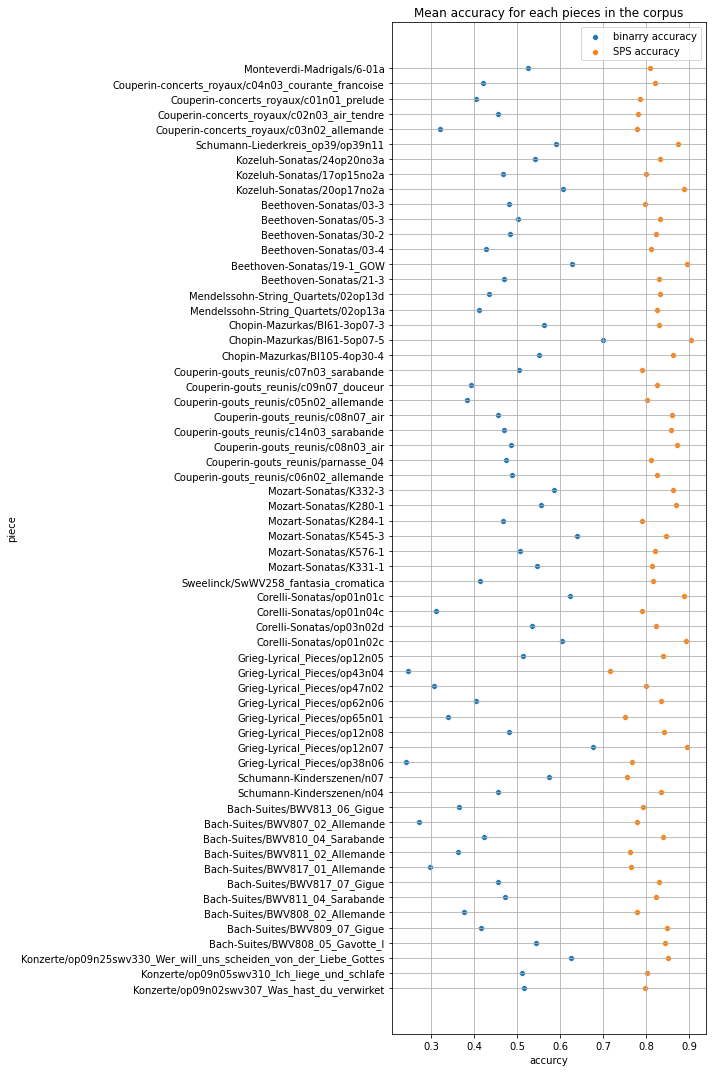

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10,15))

sns.scatterplot(data=corpus_df, x='binary_accuracy', y='name', label='binarry accuracy', marker='o', ax=ax)
sns.scatterplot(data=corpus_df, x='sps_accuracy', y='name', label='SPS accuracy', marker='o', ax=ax)
ax.set(title='Mean accuracy for each pieces in the corpus', xlabel='accurcy', ylabel='piece')
ax.grid()
ax.legend()
fig.tight_layout()

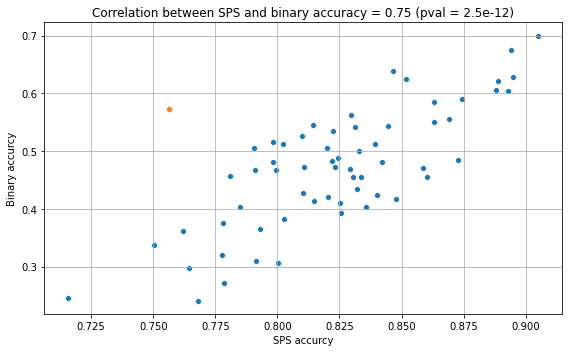

In [63]:
outlier_sps = corpus_df.sps_accuracy.nsmallest(3).iloc[2]
outlier = corpus_df.query('sps_accuracy == @outlier_sps').name.iloc[0]
corr = stats.pearsonr(corpus_df['sps_accuracy'],corpus_df['binary_accuracy'])

fig, axs = plt.subplots(1,1, figsize=(8,5))

sns.scatterplot(data=corpus_df, x='sps_accuracy', y='binary_accuracy', marker='o', ax=axs)
sns.scatterplot(data=corpus_df.query('sps_accuracy == @outlier_sps'), x='sps_accuracy', y='binary_accuracy',
                marker='o', ax=axs)

axs.set(title='Correlation between SPS and binary accuracy = {:.2} (pval = {:.2g})'.format(corr[0], corr[1]),
        xlabel='SPS accurcy', ylabel='Binary accurcy')
axs.grid()
fig.tight_layout()

In [18]:
outlier

'Schumann-Kinderszenen/n07'

___

____

In [19]:
from fractions import Fraction

In [20]:
SKn7_df = pd.read_csv('./output_sps_kse-100/Schumann-Kinderszenen/n07_results.tsv',
                      sep='\t', index_col=0, converters={'duration': Fraction})

SKn7_df['gt_chord_type'] = SKn7_df['gt_chord_type'].apply(lambda r : ChordType[r.split(".")[1]])
SKn7_df['est_chord_type'] = SKn7_df['est_chord_type'].apply(lambda r : ChordType[r.split(".")[1]])    
SKn7_df['sps_distance'] = SKn7_df.apply(lambda r : chord_SPS(r.gt_chord_root,
                                                             r.est_chord_root,
                                                             r.gt_chord_type,
                                                             r.est_chord_type,
                                                             r.gt_chord_inv,
                                                             r.est_chord_inv
                                                            )[0], axis=1)

SKn7_df['sps_accuracy'] = SKn7_df['sps_distance'].apply(lambda sps :1-sps)

In [53]:
len(SKn7_df.query('full_correct == False')), len(SKn7_df)

(75, 171)

In [49]:
SPS_false_est_df = SKn7_df.query('full_correct == False')
SPS_false_est_df = SPS_false_est_df[['gt_chord', 'est_chord','sps_accuracy']].drop_duplicates()
SPS_false_est_df

,gt_chord,est_chord,sps_accuracy
10,"A#/Bb:M, inv:0","F:M, inv:0",0.333839
13,"C:M, inv:0","F:Mm7, inv:2",0.639921
20,"C:M, inv:0","F:M, inv:1",0.596585
21,"F:M, inv:0","C:M, inv:0",0.592546
27,"C:M, inv:2","C:M, inv:0",0.954418
38,"A:Mm7, inv:1","F:M, inv:0",0.200021
45,"F:m, inv:0","C:M, inv:0",0.587991
46,"G:M, inv:0","C:M, inv:0",0.336733
48,"G:M, inv:0","C:mm7, inv:0",0.303233
49,"F#/Gb:o7, inv:1","C:mm7, inv:0",0.715326


In [50]:
SPS_false_est_df = SPS_false_est_df.pivot(index='gt_chord', columns='est_chord', values='sps_accuracy')

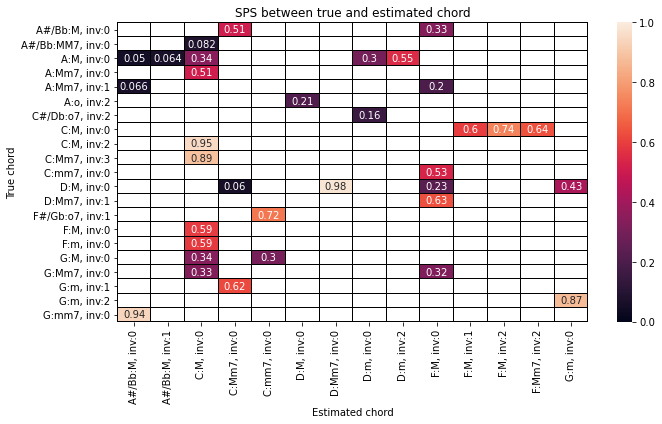

In [64]:
fig, axs = plt.subplots(1,1,figsize = (10,6))

sns.heatmap(SPS_false_est_df, annot=True, vmin = 0, vmax = 1, ax = axs,
            linecolor = 'black', linewidths = 0.005)

axs.set(title='SPS between true and estimated chord', xlabel='Estimated chord', ylabel='True chord')
fig.tight_layout()